In [51]:
!pip install pandas seaborn matplotlib

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_theme()

In [53]:
customer_data = pd.read_csv('/home/rudraksh/demo/Customer-Segmentation_End-to-end-Project/Dataset/sales_data_sample.csv',encoding='unicode_escape')

In [54]:
customer_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [55]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


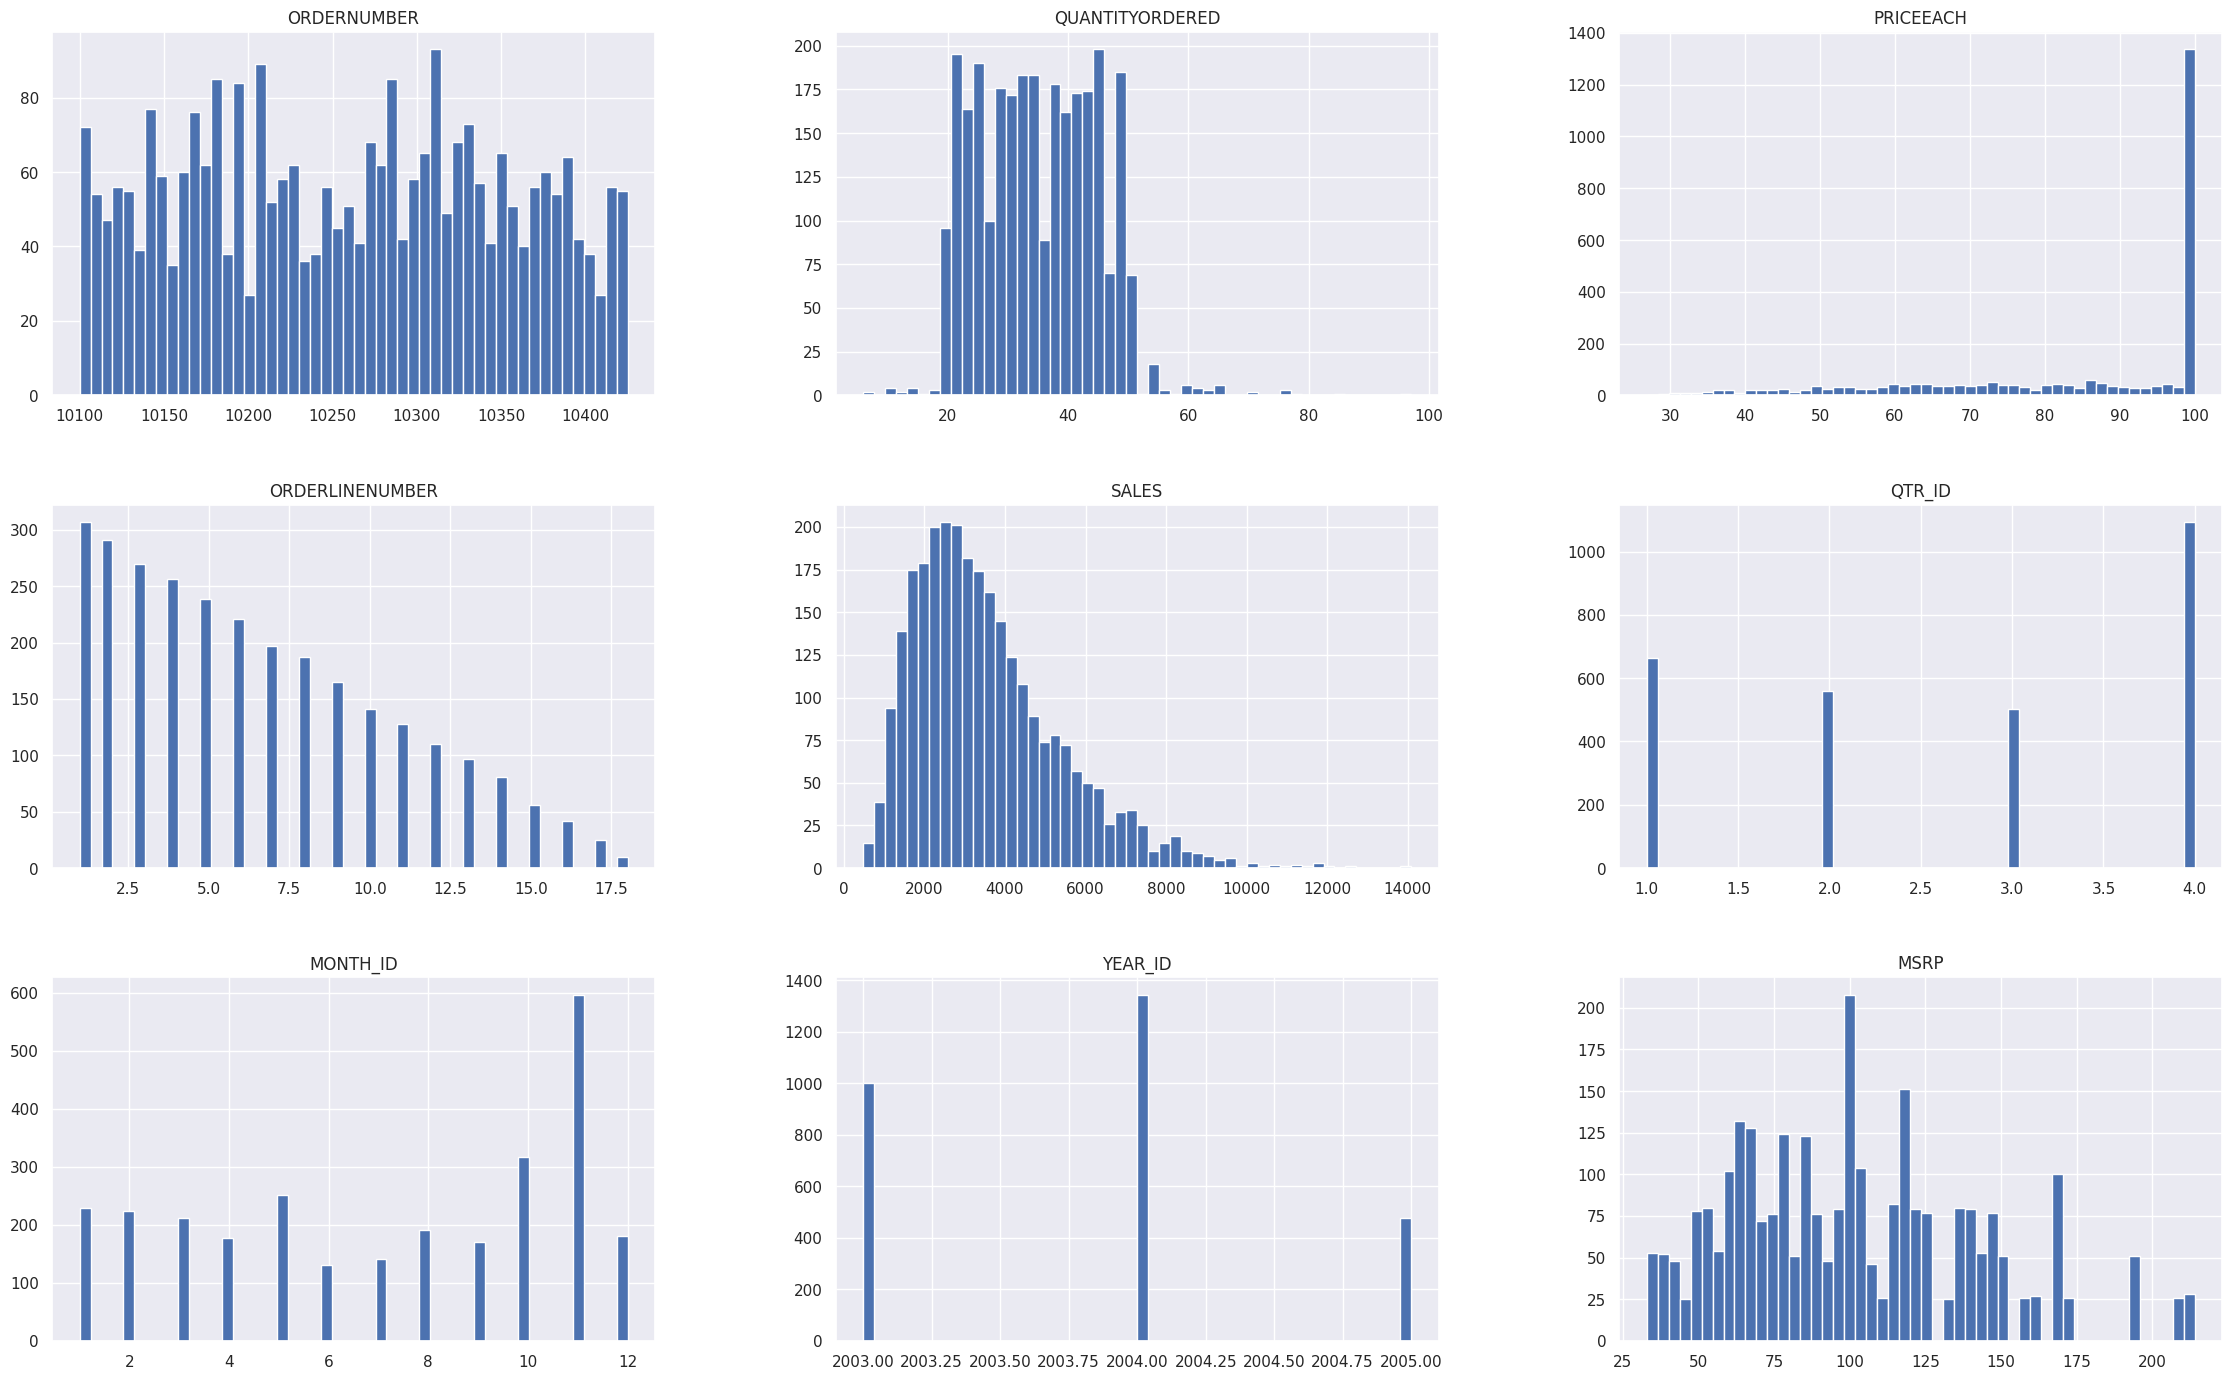

In [56]:
customer_data.hist(bins=50, figsize=(28,17))
plt.show()

In [57]:
customer_data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


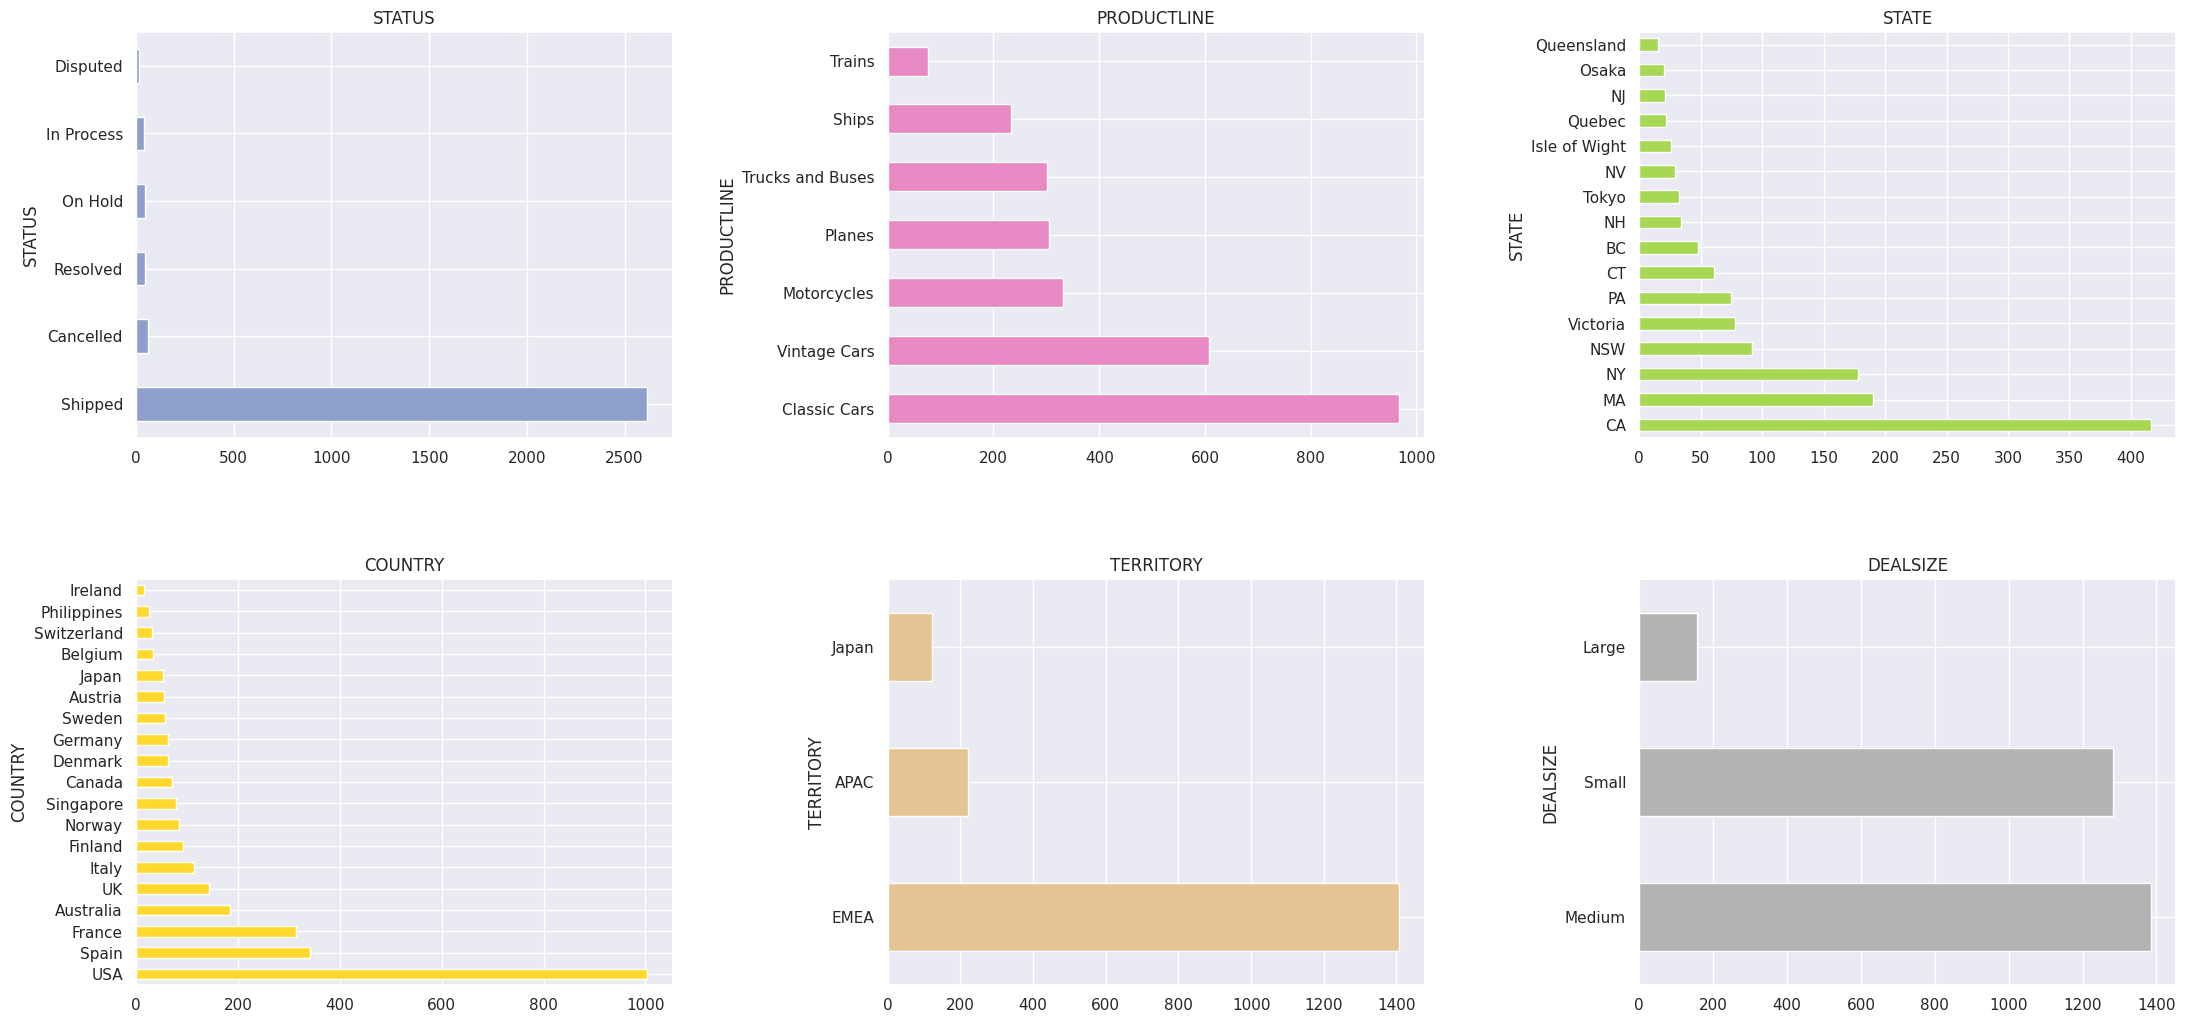

In [58]:
#so as not to spoil our original data
DataCopy = customer_data.copy()

#we select the categorical attributes and pull out some data that is almost impossible to plot
DatasetAux = DataCopy.select_dtypes(include=['object']).drop(['ORDERDATE','PRODUCTCODE','CUSTOMERNAME','PHONE'
                                                        ,'ADDRESSLINE1','ADDRESSLINE2','POSTALCODE','CONTACTLASTNAME'
                                                        ,'CONTACTFIRSTNAME','CITY','ADDRESSLINE1'],axis=1)

#we create a list with the plottable categorical attributes
catList = DatasetAux.columns.to_list()


#chosen color map
cmap1 = mpl.cm.Set2

fig=plt.figure(figsize=(16,12))

#loop that plots all the data we want using the value_counts() method
for i, col in enumerate(catList):
  ax=fig.add_subplot(3,3,i+1)
  plt.xlabel('Number of Occurrences')
  plt.ylabel('Categories')
  valuec = DataCopy[col].value_counts().plot(kind='barh',title=col,color=cmap1(i + 2),grid=True,ax=ax)
  plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.4, 
                    top=1.35, 
                    wspace=0.4, 
                    hspace=0.35)
plt.show()


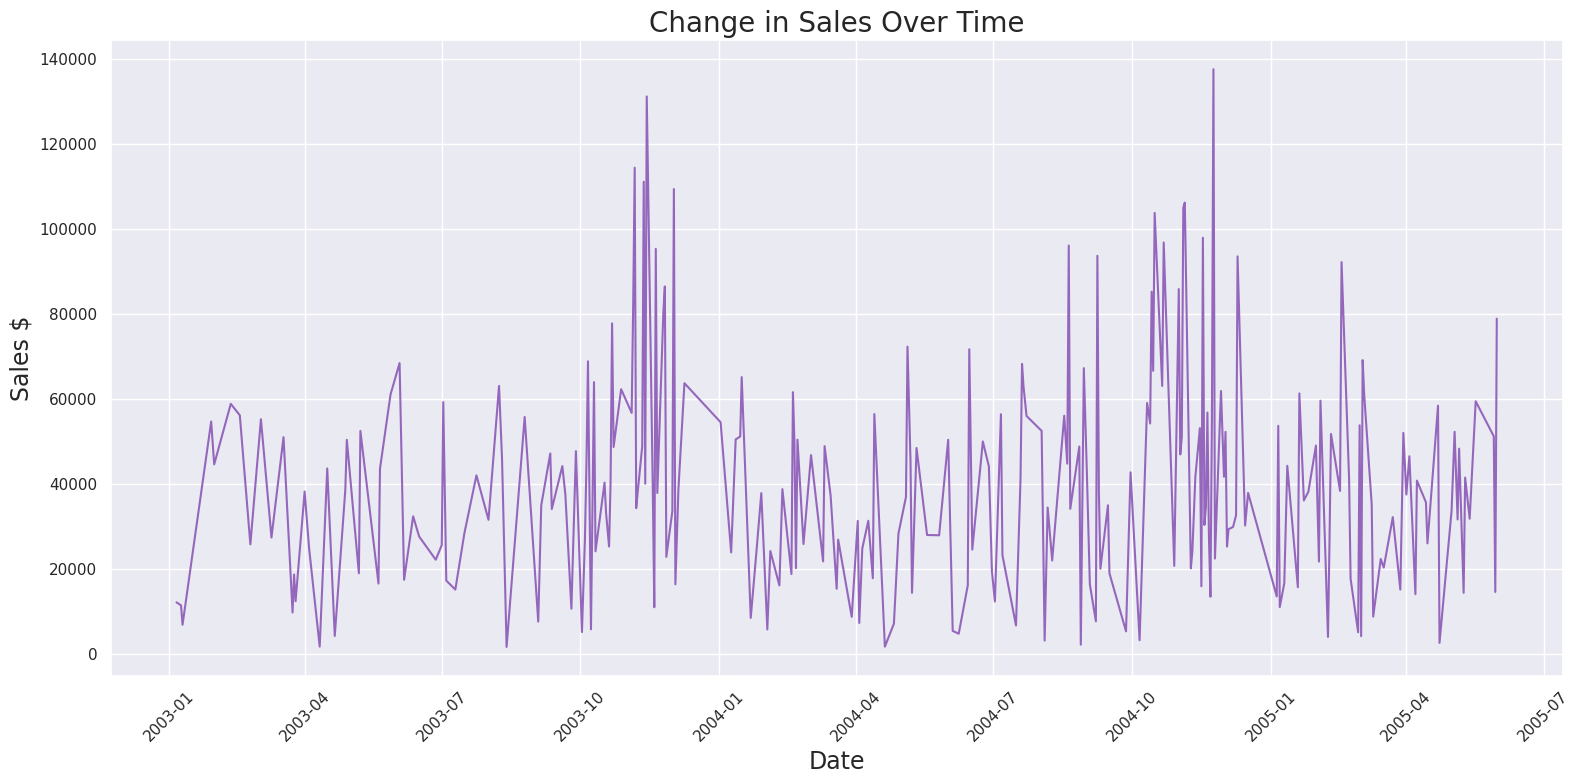

In [59]:
#Convert order date to datetime format
DataCopy['ORDERDATE'] = pd.to_datetime(DataCopy['ORDERDATE'])

#we group together orders that were placed on the same date
DtGroup = DataCopy.groupby('ORDERDATE').sum()

#plotting
fig=plt.figure(figsize=(16,8))

plt.title('Change in Sales Over Time',fontsize = 20)
plt.xlabel('Date',fontsize=17)
plt.ylabel('Sales $',fontsize=17)
plt.xticks(rotation=45)
plt.plot(DtGroup.index,DtGroup.SALES,color='tab:purple')
fig.tight_layout()
plt.show()

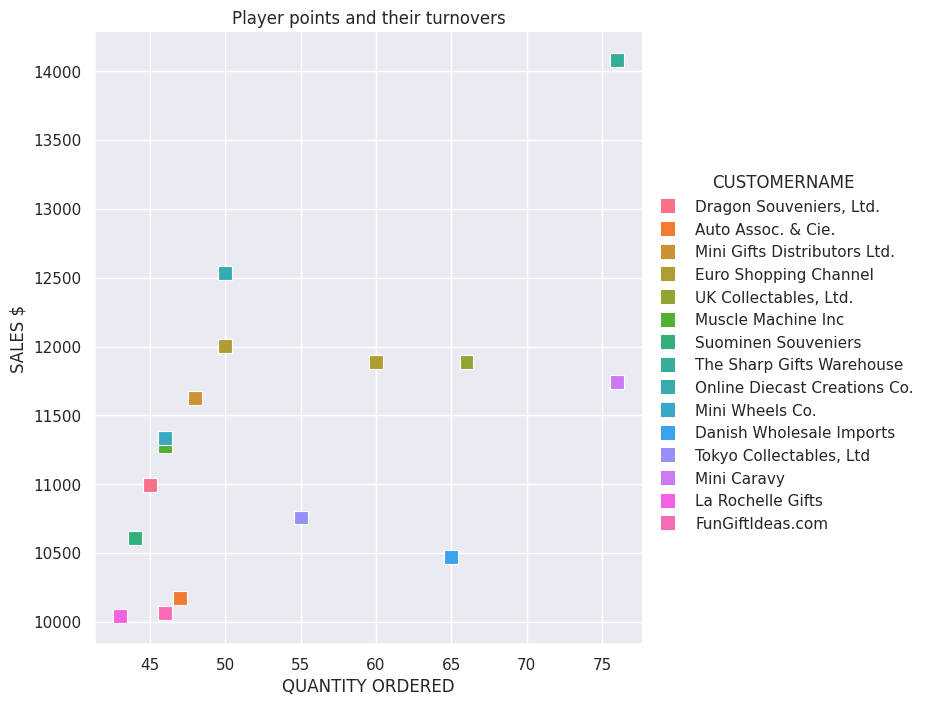

In [60]:
#we create smaller data to get only the best sales.
morefewerdata = DataCopy[(DataCopy['QUANTITYORDERED'] > 40) & (DataCopy['SALES'] > 10000)].copy()

#plotting
graph = sns.relplot(x=morefewerdata['QUANTITYORDERED'],y=morefewerdata['SALES'],height = 7,hue=morefewerdata['CUSTOMERNAME'],s=100,marker=r's')
graph.set(title="Player points and their turnovers")
graph.set_ylabels("SALES $", clear_inner=False)
graph.set_xlabels("QUANTITY ORDERED", clear_inner=False)

In [61]:
Dataset = customer_data.copy()

DatasetNum = Dataset.select_dtypes(include=[np.number])#only the numerical data for later

In [62]:
Dataset = customer_data.copy()


to_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 
            'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME',
            'ORDERNUMBER', "ORDERDATE","QTR_ID","ORDERLINENUMBER","YEAR_ID","PRODUCTCODE"]

Dataset = Dataset.drop(to_drop, axis = 1) 

In [63]:
!pip install scikit-learn imblearn

In [64]:
#Such transformations in our numeric attributes
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,PowerTransformer

Dataset_num = Dataset.select_dtypes(include=[np.number])#only the numerical data 

#pipeline that enforces the transformations
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('PowerTransformer',PowerTransformer(method='yeo-johnson',standardize=True)),
        ('scaler',StandardScaler()),
          
    ])

dataset_num_tr = num_pipeline.fit_transform(Dataset_num)

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#list the numerical data
num_attribs = list(Dataset_num)


dataset_cat =  Dataset.select_dtypes(include=['object'])#take the categorical data
cat_attribs = list(dataset_cat)#list the categorical data

#apply the total transformation to the categorical and numerical data
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown = 'ignore'), cat_attribs)
    ])

dataset_prepared = full_pipeline.fit_transform(Dataset)

In [66]:
dataset_prepared = dataset_prepared.toarray()

### 5.4 - Choose and Train The Model

Let's now implement our model which is called K-means Clustering, such an algorithm groups the data from k-centers in distinct areas of the feature space, which he thinks portrays too distinct groups. k is an integer, however, how to choose the value of K? Basically, before knowing what the best K is, we must keep in mind that the model uses a performance metric called inertia, which is the "mean squared distance between each instance and the nearest centroid" (Géron, 2019). As we cannot have a very low inertia we choose it before the value decreases faster. So let's plot the inertia as a function of the number of clusters and understand what happens.

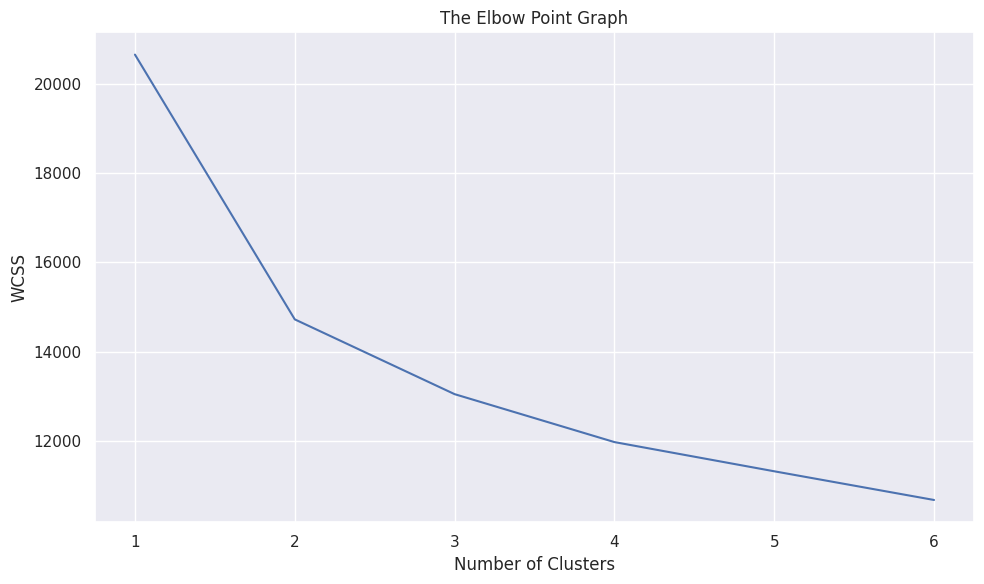

In [67]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset_prepared)
    wcss.append(kmeans.inertia_) 
    # intertia is the Sum of squared distances of samples to their closest cluster center (WCSS)

f=plt.figure(figsize=(10,6))

plt.plot(range(1,7), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
f.tight_layout()
plt.show()

For this result, we use k-means with 3 clusters.

In [68]:
#model
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=0)
kmeans.fit(dataset_prepared)
labels = kmeans.labels_


#We insert the clusters into another dataset created
Dataset2 = Dataset.copy()
Dataset2['clusters'] = kmeans.fit_predict(dataset_prepared)

Now that we've segmented the customers, we can find the pattern for each customer group.

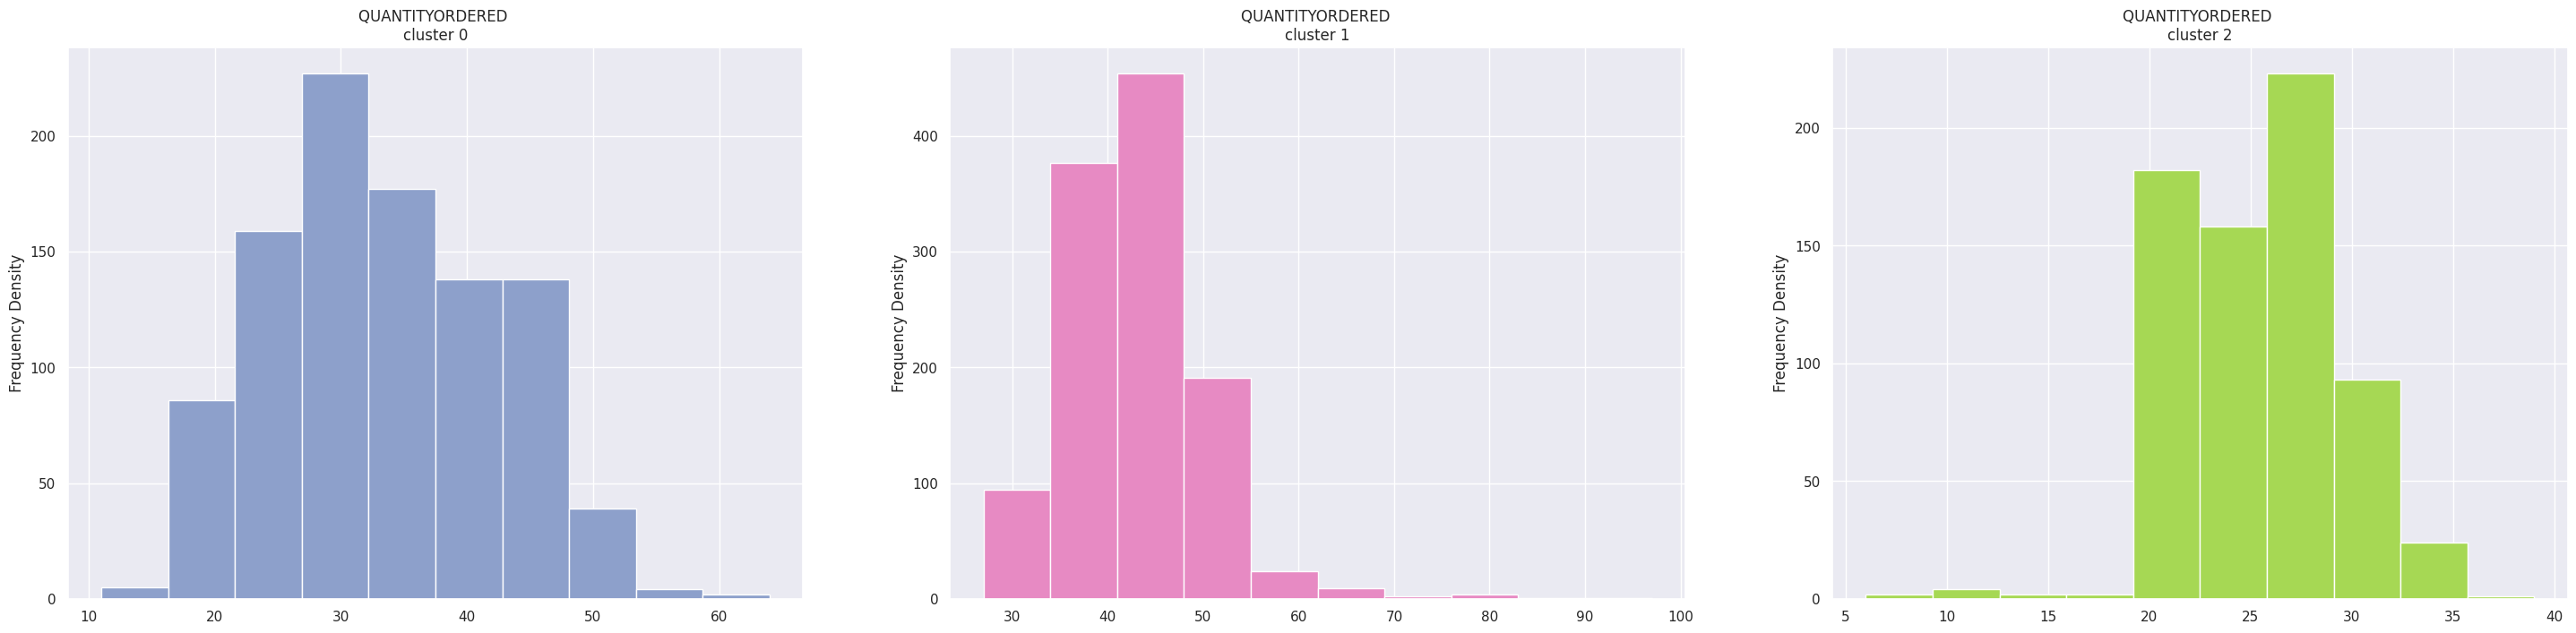

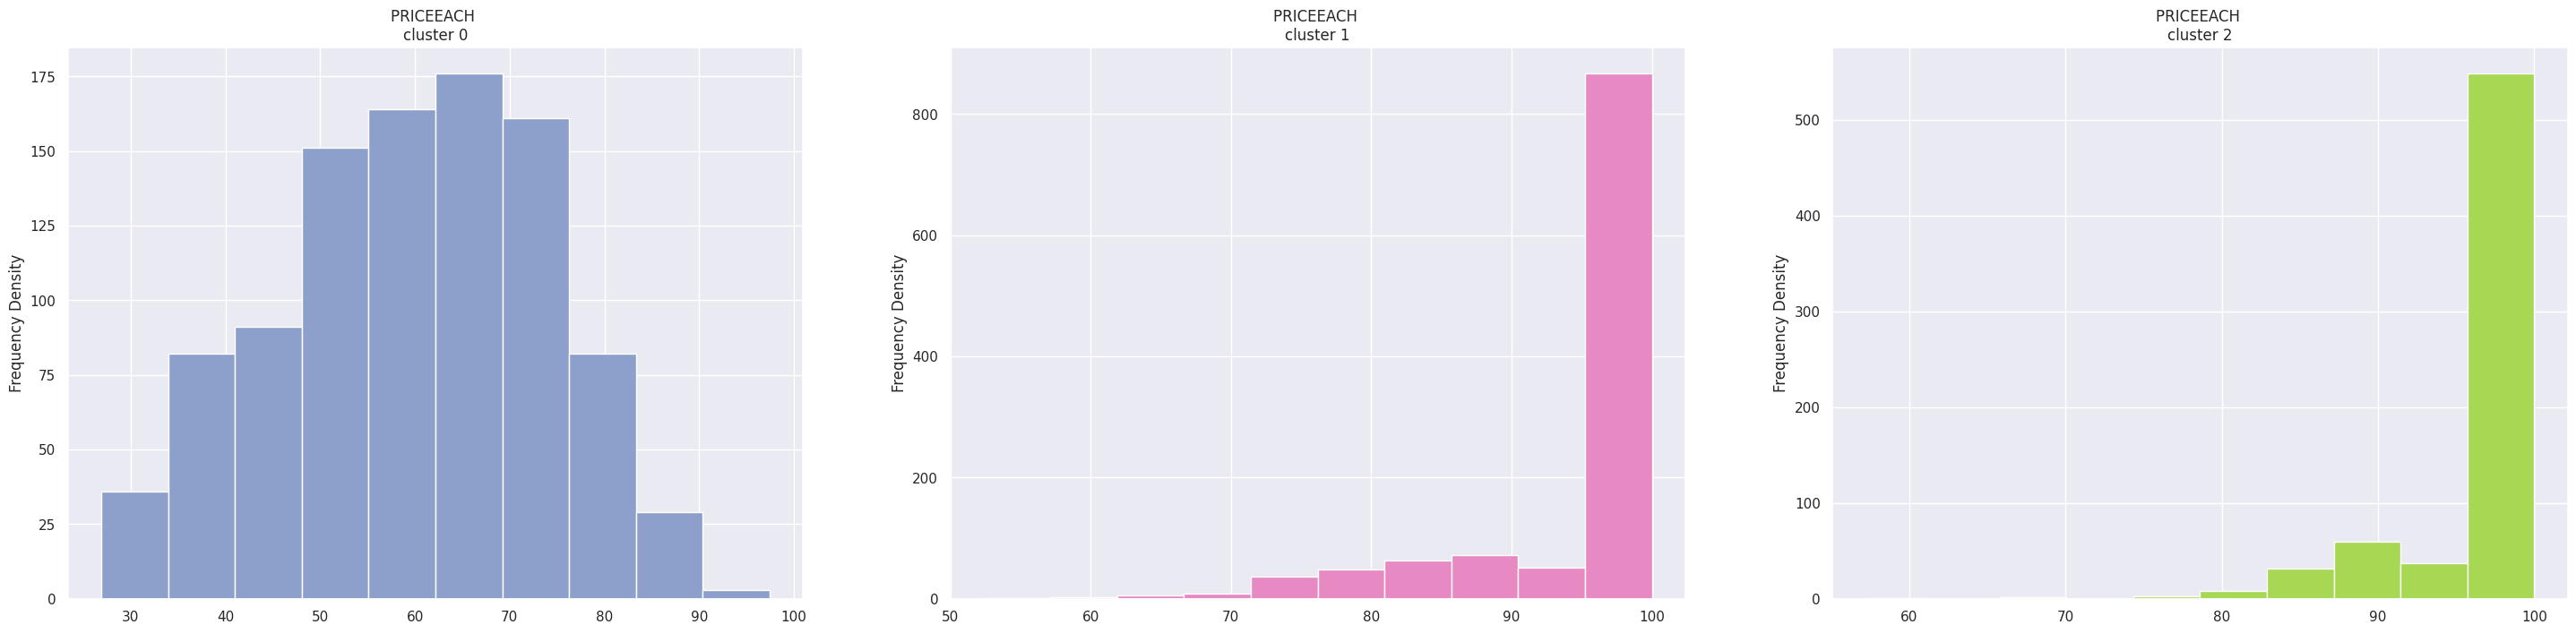

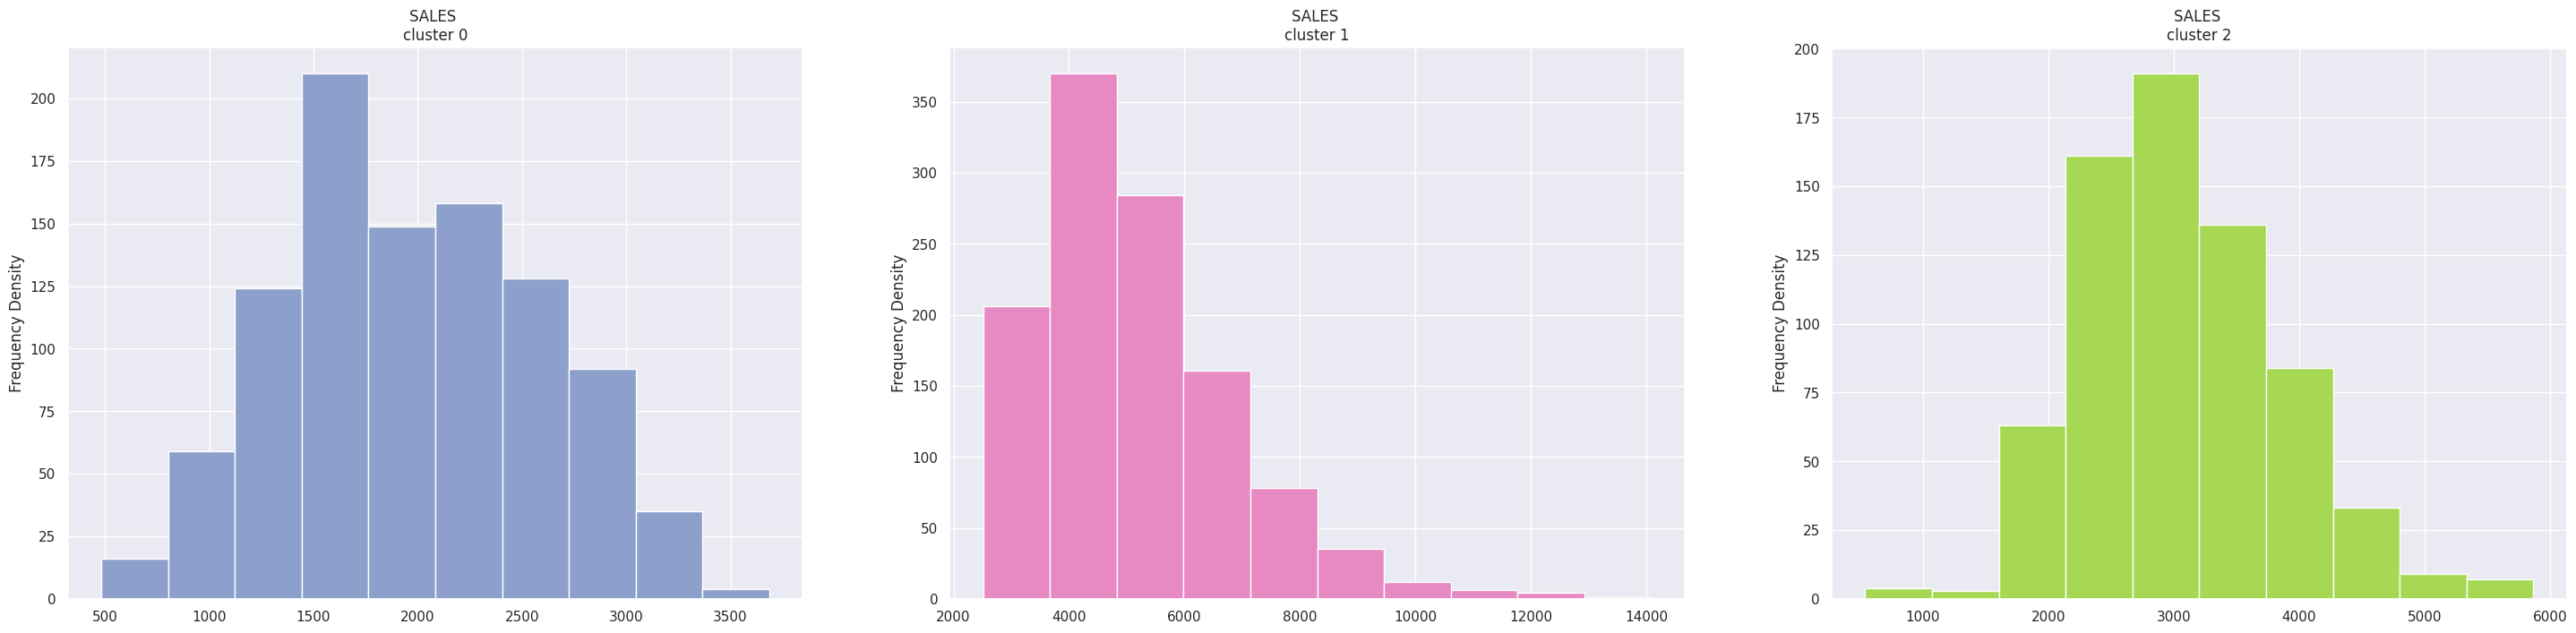

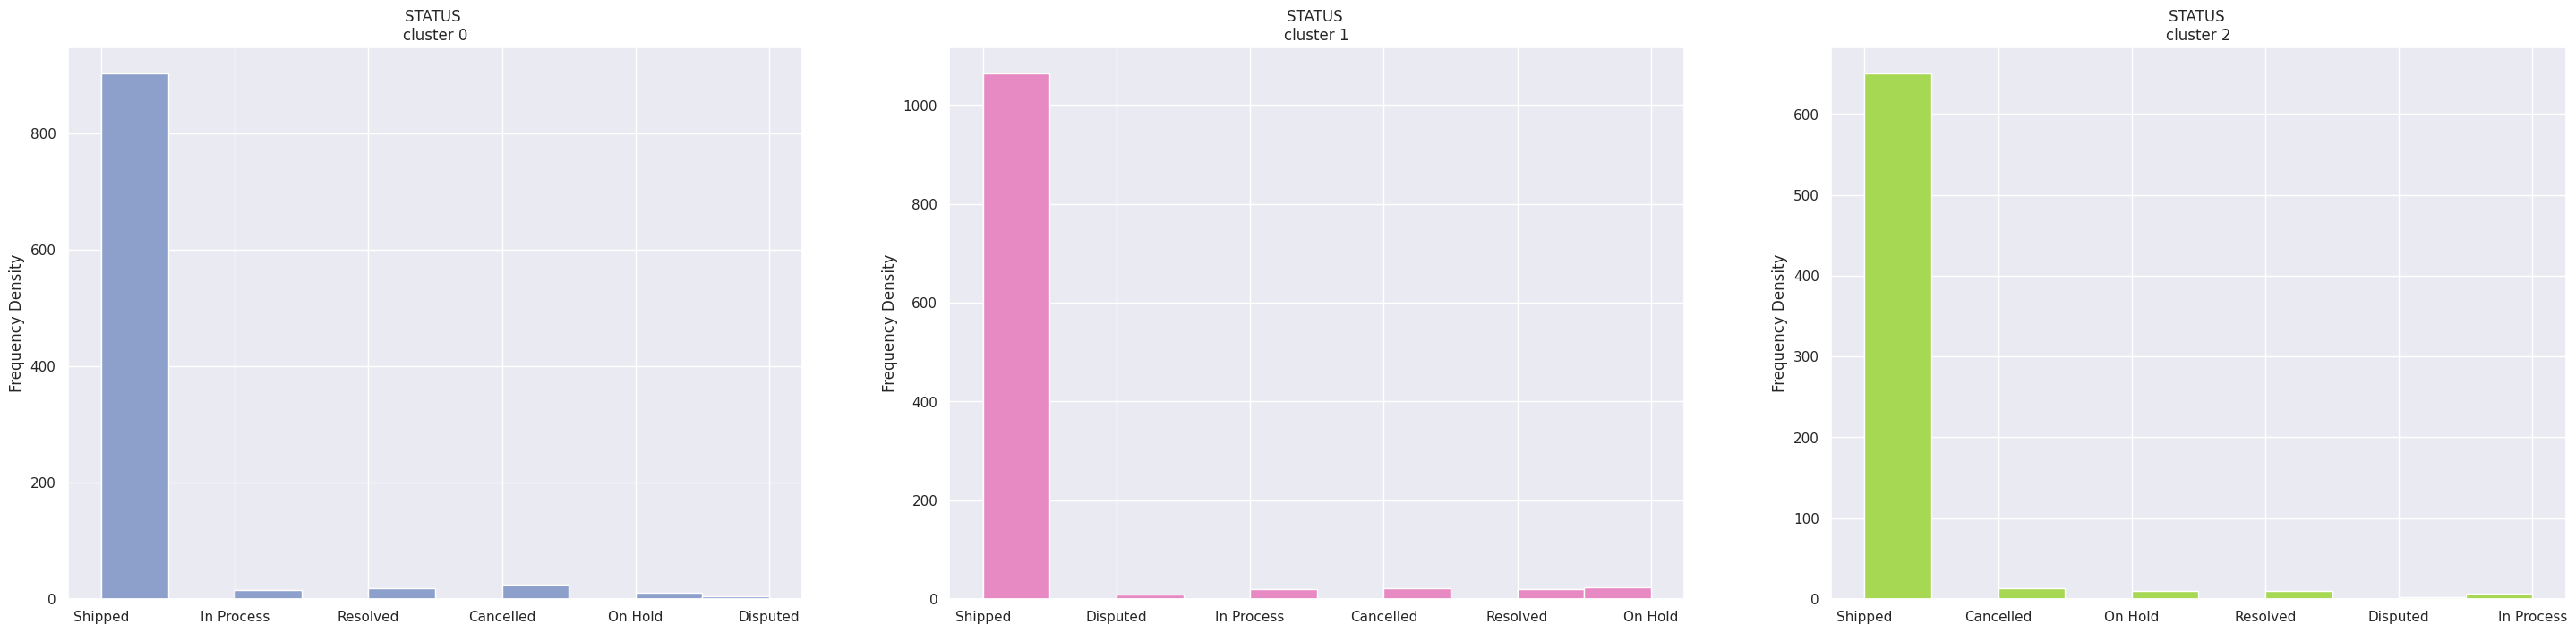

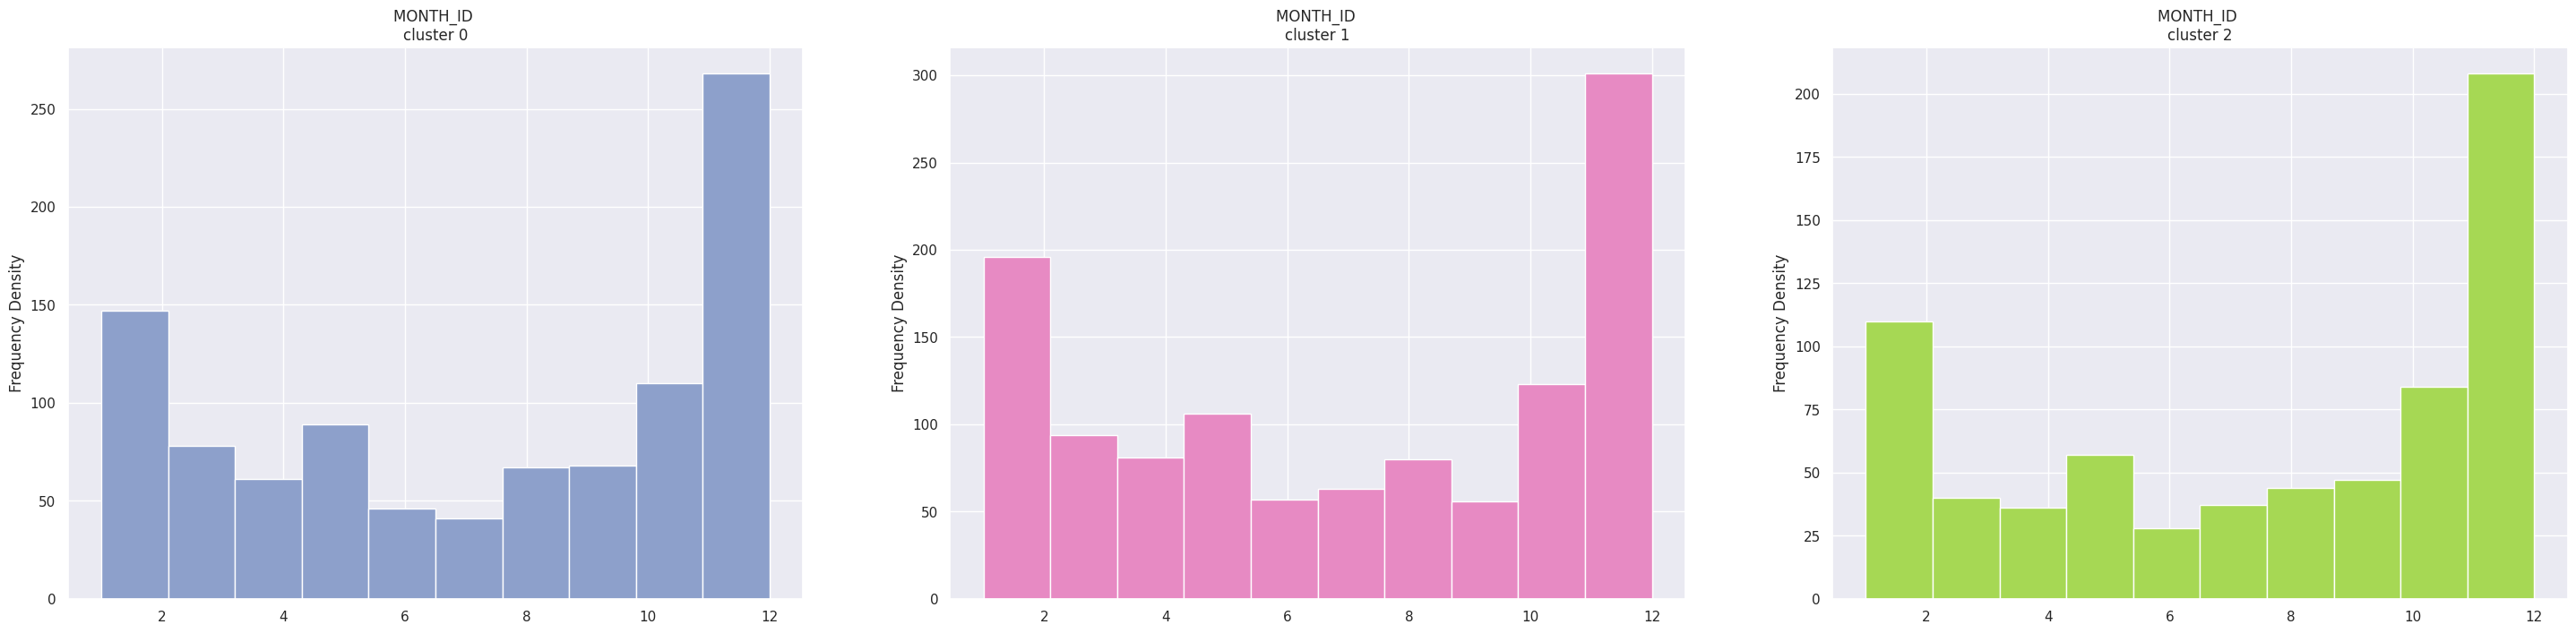

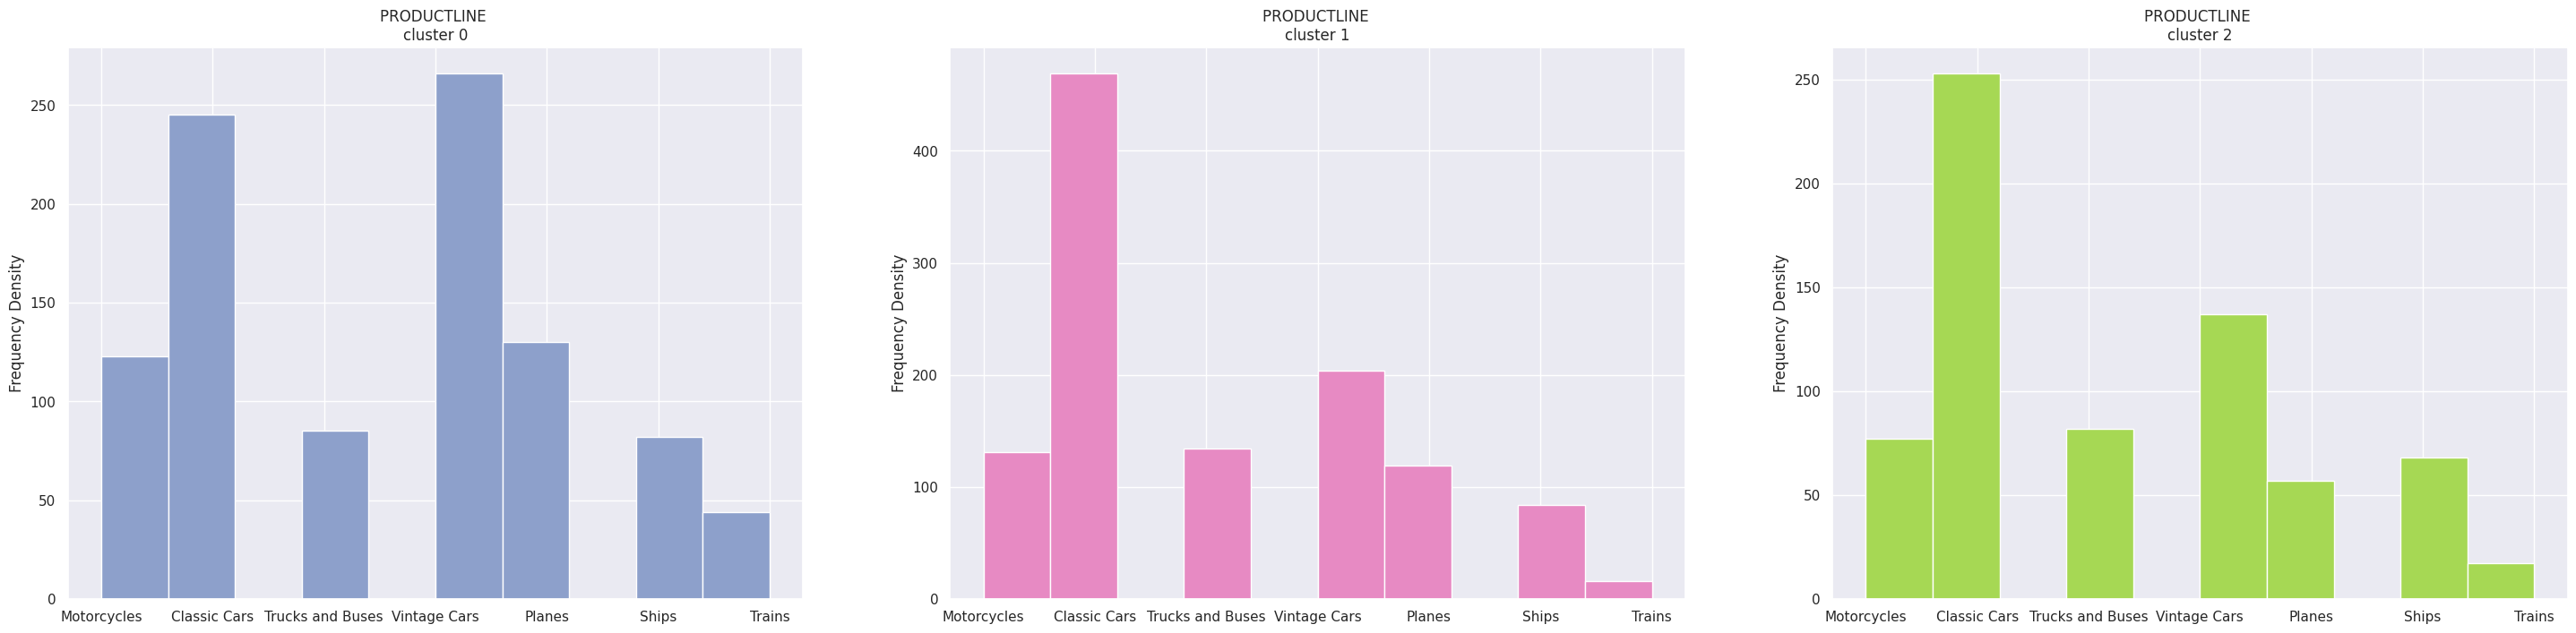

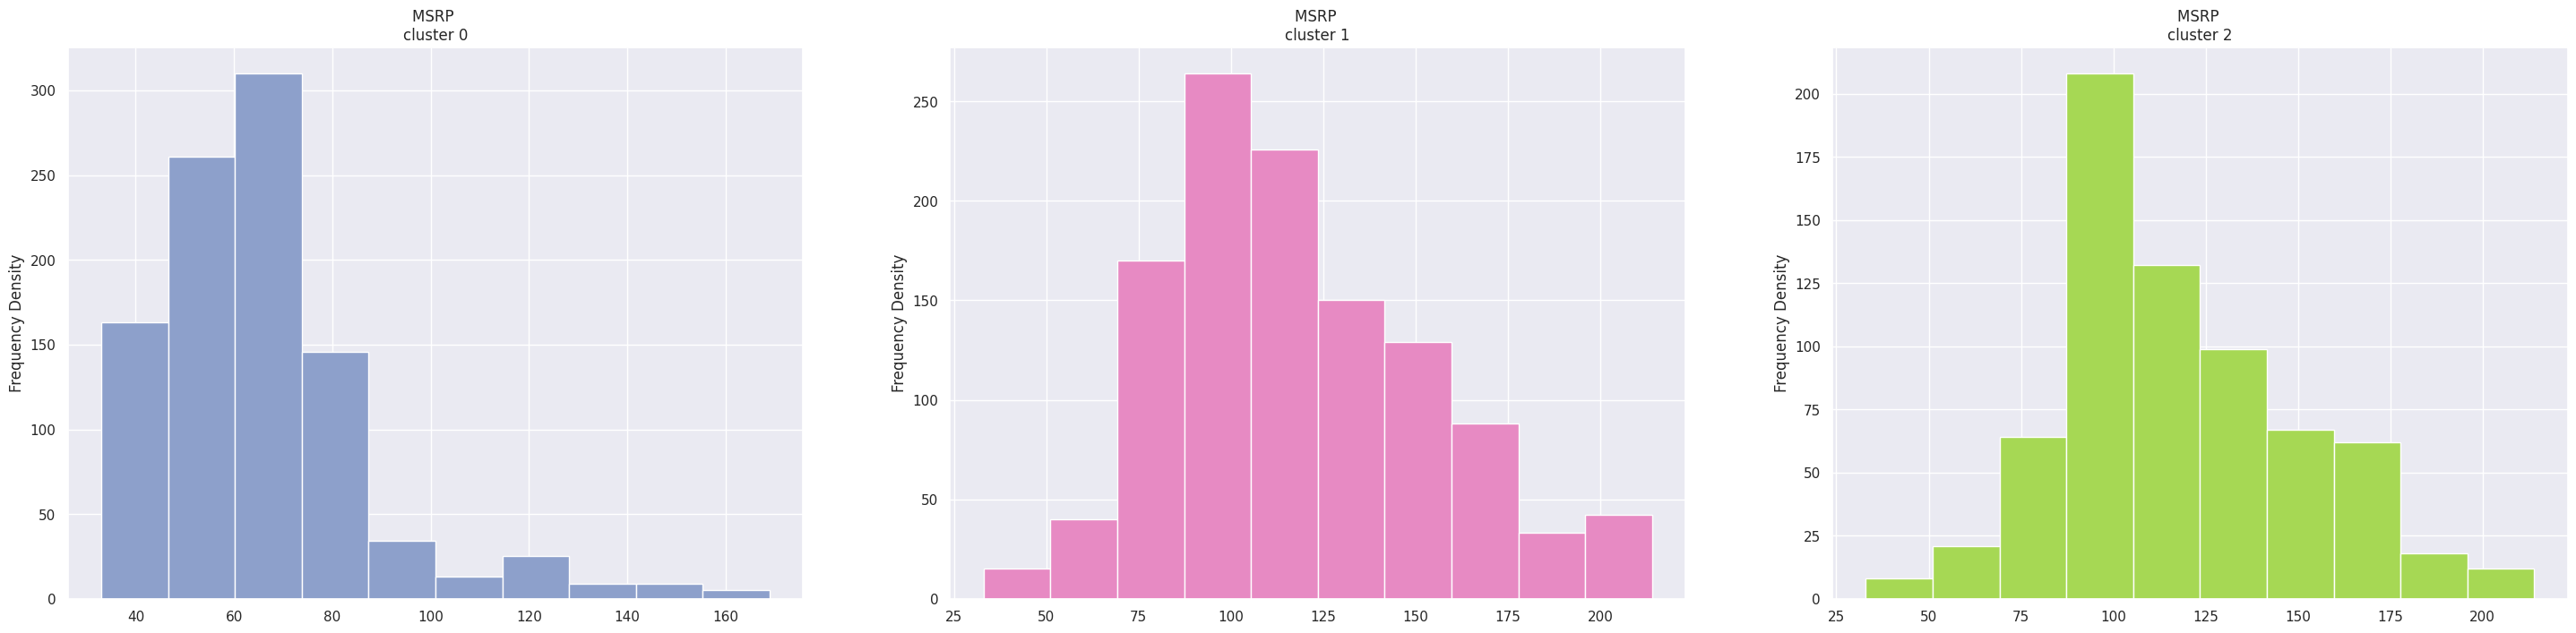

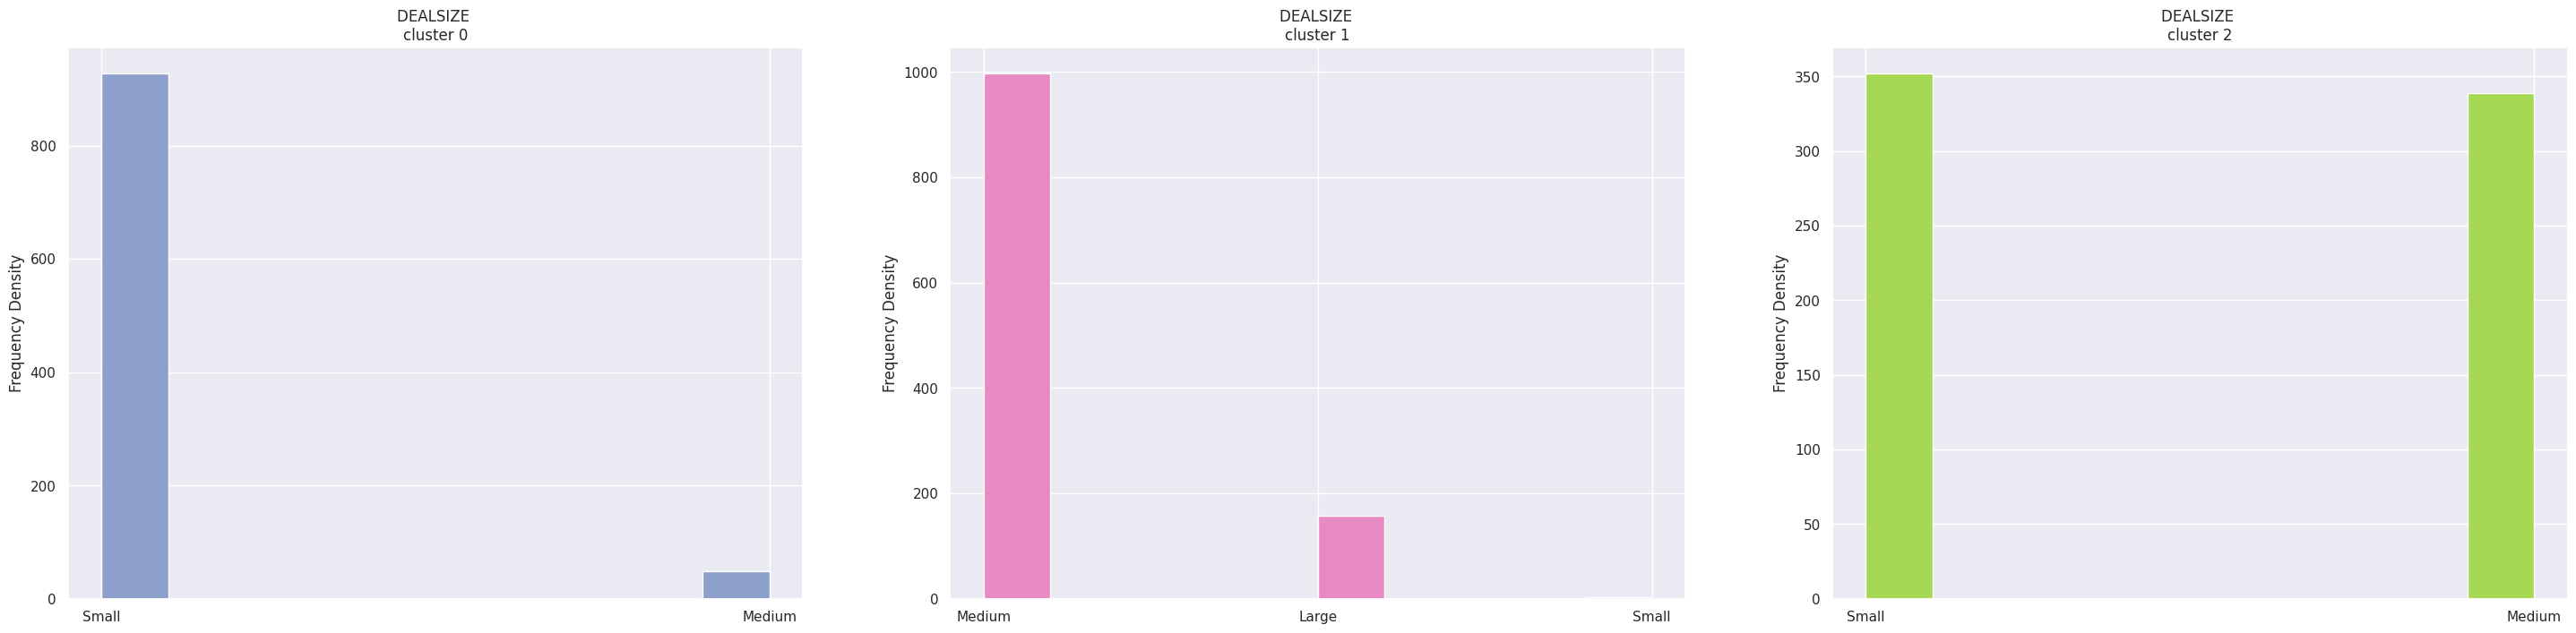

In [69]:
Dataset3 = Dataset2.drop('COUNTRY',axis=1).copy()#we removed a column difficult to paint

#color map for plotting
cmap1 = mpl.cm.Set2

# plot histogram for each feature based on cluster 
for i in Dataset3.columns[:8]:
    plt.figure(figsize=(36,8))
    for j in range(3):
        plt.subplot(1,3,j+1)
        cluster = Dataset3[Dataset3['clusters']==j]
        cluster[i].hist(color=cmap1(j + 2))
        plt.ylabel('Frequency Density')
        plt.title('{} \ncluster {}'.format(i,j))
plt.show()

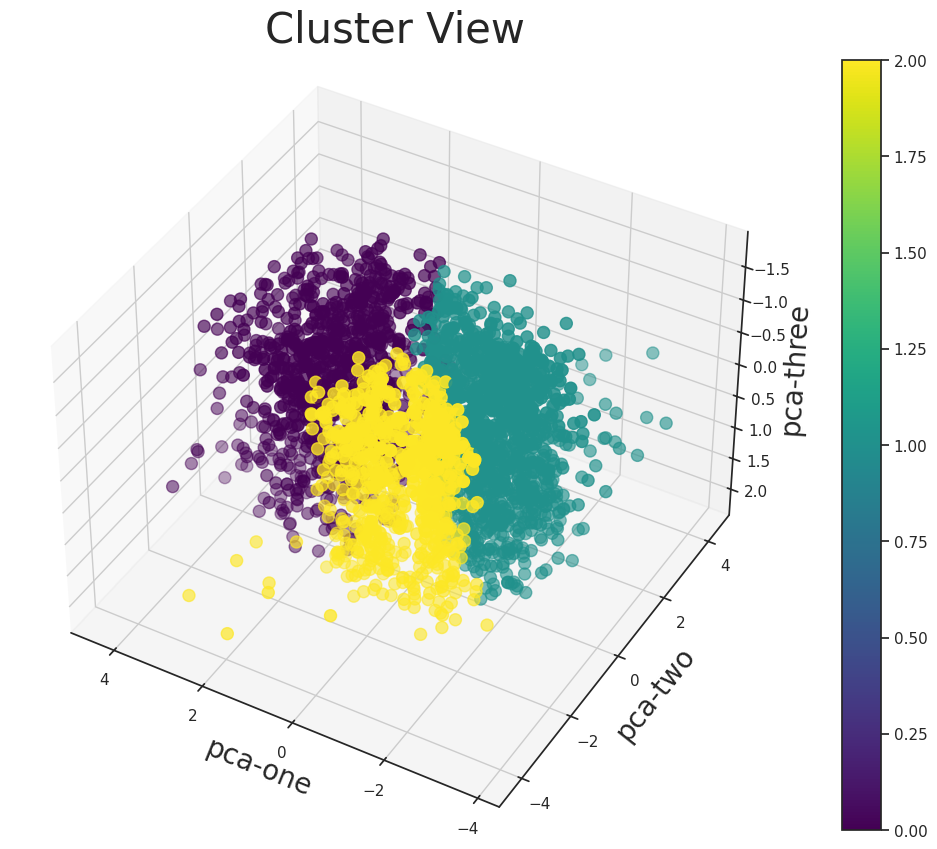

In [70]:
from sklearn.decomposition import PCA
from matplotlib import colorbar


sns.set_theme(style="white")

#choose the dimension
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(dataset_prepared)#fit the model on the data

#create a dictionary with all the information we want to plot
thisdict = {
  "pca1": principal_comp[:,0],
  "pca2": principal_comp[:,1],
  "pca3": principal_comp[:,2],
  'cluster': labels
}

#we create the dataframe from the dictionary
pca_df = pd.DataFrame(thisdict)

#set the fig size and take the figure
fig = plt.figure(figsize=(16,10))

#set a 3d plot on the axes
ax = fig.add_subplot(111, projection='3d')

#plot
p = ax.scatter(
    xs=pca_df['pca1'], ys=pca_df['pca2'], zs=pca_df['pca3'], 
    c=labels,s=75,
    cmap='viridis'
)

#labels ans titles
ax.set_xlabel('pca-one',fontsize = 20)
ax.set_ylabel('pca-two',fontsize = 20)
ax.set_zlabel('pca-three',fontsize = 20)
ax.view_init(-140, 60)

plt.title('Cluster View',fontsize = 30,x=0.5, y=1.1)

#side color bar
fig.colorbar(p, ax=ax)

plt.show()


In [71]:
import pickle

In [72]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("kmeans", KMeans(n_clusters=3, init='k-means++',random_state=0))
    ])

full_pipeline_with_predictor.fit(Dataset)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('PowerTransformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['QUANTITYORDERED',
                                                   'PRICEEACH', 'SALES',
                                                   'MONTH_ID', 'MSRP']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['STATUS', 'PRODUCTLINE',
                                                   'COUNTRY', 'DEALSIZE'])])),
                ('kmeans', KMeans(n_clusters=3, random_state=0))])

In [73]:
model = full_pipeline_with_predictor


filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [74]:
loadModel = pickle.load(open(filename, 'rb'))

# return a label for each data point based on their cluster
Y = loadModel.predict(Dataset)

print(Y)

[2 0 1 ... 1 0 0]
